### 1. 遗传算法

科学定义：

遗传算法（Genetic Algorithm, GA）起源于生物系统所进行的计算机模拟研究。它是模仿自然界生物进化发展起来的随机全局搜索和优化方法，借鉴了达尔文的进化论和孟德尔的遗传学说。其本质是一种高效、并行、全局搜索方法，能在搜索过程中自动获取和积累有关搜索空间知识，并自适应地控制搜索过程以求得最佳解。

相关术语：

* 基因型：性状染色体的内部表现；
* 表现型：染色体决定的性状外部表现，或者说，根据基因型形成的个体的外部表现；
* 进化：种群逐渐适应生存环境，品质不断得到改良。生物进化是以种群的形式进行的；
* 适应度：度量某个物种对于生存环境的适应程度；
* 选择：以一定概率从种群中选择若干个个体。一般，选择过程是一种基于适应度的优胜劣汰的过程；
* 复制：细胞分裂时，遗传物质DNA通过复制而转移到新产生的细胞中，新细胞就继承了旧细胞的基因；
* 交叉：两个染色体的某一相同位置处DNA切断，前后两串分别交叉组合形成两个新的染色体。也称基因重组或杂交；
* 变异：复制时可能（小概率）产生某些复制差错，变异产生新的染色体，变现出新的性状；
* 编码：DNA中遗传信息在一个长链上按一定的模式排列。遗传编码可看做从表现型到基因型的映射；
* 解码：基因型到表现型的映射；
* 个体：指染色体带有特征的实体；
* 种群：个体的集合，该集合内个体数称为种群的大小。

遗传算法的有趣应用很多，诸如寻路问题，8数码问题，囚犯困境，动作控制，找圆心问题（在一个不规则的多边形中，寻找一个包含在该边型的最大圆圈的圆心），TSP问题，生产调度问题，人工生命模拟等。下面以袋鼠为例讲解遗传算法：

> 思考：遗传算法和EM算法都是属于优化算法家族的，且都有较大应用..

遗传算法中每一条染色体，对应着遗传算法的一个解决方案，一般我们用适应性函数来衡量这个解决方案的优劣。所以从一个基因组到其解得适应度形成一个映射。可以把遗传算法的过程看做是一个在多元函数里面求最优解的过程。可以这样想象，这个多维曲面里面有数不清个“山峰”，而这些山峰所对应的就是局部最优解。而其中也会有一个“山峰”的海拔最高的，那么这个就是全局最优解。而遗传算法的任务就是尽量爬到最高峰，而不是陷落在一些小山峰里。（另外，值得注意的是遗传算法不一定要找到“最高的山峰”，如果问题的适应度评价越小越好的话，那么全局最优解就是函数的最小值，对应的，遗传算法所要找的就是“最深的谷底”）

> 思考：用来寻找非凸问题的全局最优解

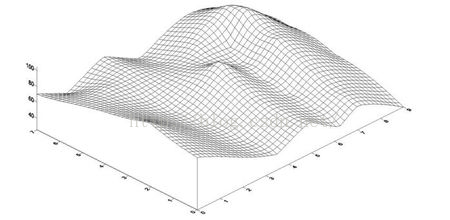

**问题的提出与解决方案：**

让我们先来考虑下面这个问题的解决办法：

已知一元函数：

$$f(x) = x\sin(10\pi x) + 2 \hspace{0.2cm} x∈[-1, 2]$$

现在要求在既定的区间内找出函数的最大值，如下图所示：

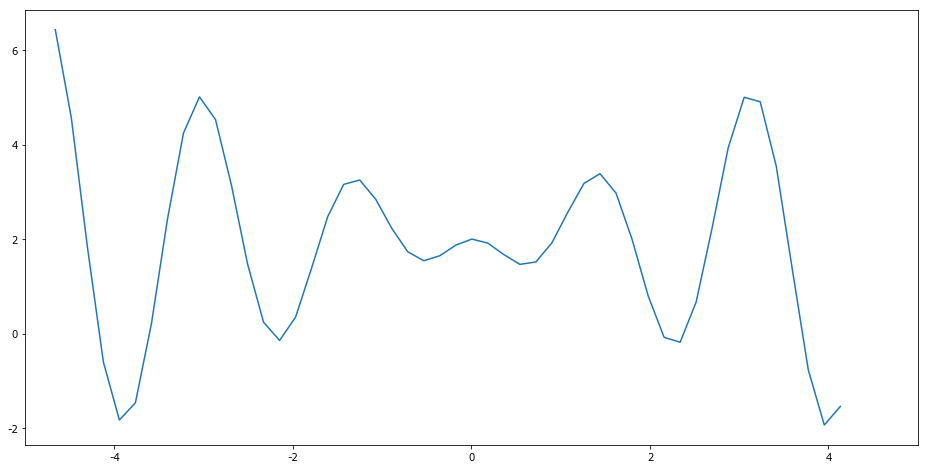

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rands = np.random.randn(50000)
x = np.linspace(rands.min(), rands.max())
y = x * np.sin(10 * np.pi * x) + 2

plt.figure(figsize=(16, 8))

plt.plot(x, y)
plt.xlim([-5, 5])
plt.show()

**“袋鼠跳”问题**

既然我们把函数曲线理解成一个个山峰和山谷组成的山脉。那么我们可以设想所得到的每个节就是一只袋鼠，我们希望它们不断的向着更高处跳去，直到跳到最高的山峰（尽管袋鼠不见得愿意那么做）。所以求最大值的过程就转化成一个”袋鼠跳“的过程。

作为对比下面简单介绍”袋鼠跳“的几种方式。

1. 爬山法（最速上升爬山法）：

从搜索空间中随机产生临近的点，从中选择对应解最优的个体，替换原来的个体，不断重复该过程。因为爬山法只对”临近“的点作比较，所以目光比较”短浅“，常常只能收敛到离开初始位置比较近的局部最优解上面。对于存在很多局部最优点的问题上，通过一个简单的迭代找出全局最优解的机会是非常渺茫的。（在爬山法中，袋鼠最优希望达到最靠近它出发点的山顶，但不能保证该山顶是珠穆拉玛峰，或者是一个非常高的山峰。因为一路上它只顾上坡，没有下坡。）

> 思考：只有上坡路，不走下坡路，你怎么之后下坡之后，在上坡，不会看到更美的风景呢？！

2. 模拟退火：

这个方法来自金属热加工过程的启发。在金属热加工过程中，当金属的温度超过它的熔点时，原子就会激烈地随机运动。与所有的其它的物理系统相类似，原子的这种运动趋向与寻找其能量的极小状态。（也就是最稳定的状态，约束下的最自由的状态，最大熵原理）这个能量的变迁过程中，开始时，温度非常高，使得原子具有很高的能量。随着温度不断降低，金属逐渐冷却，金属中的原子的能量就越来越小，最后达到所有可能的最低点。利用模拟退火的时候，让算法从较大的跳跃开始，使得它有足够的”能量“逃离可能”路过“的局部最优解而不至于陷在其中，当它停在全局最优解附近的时候，逐渐的减小跳跃量，以便使其”落脚“到全局最优解上。（在模拟退火过程中，袋鼠喝醉了，而且随机地大跳跃了很长时间。运气好的话，它从一个山峰跳过山谷，到了另外一个更高的山峰上。但最后，它渐渐清醒了并朝着它所在的峰顶跳去。）

> 思考：如何判定它跳到的另一个山峰是往山顶的位置呢？也就是我们在学习的时候，给它一个大的学习率，让其逃过可能存在的局部山峰或山顶，然后在到底最高峰的那个点，逐渐减小学习率... （关键是如何判定最后这个位置就是最高峰的位置）

3. 遗传算法：

模拟物竞天择的生物进化过程，通过维护一个潜在解得群体执行了多方向的搜索，并支持这些方向上的信息构成和交换。是以面为单位的搜索，比以点为单位的搜索，更能发现全局最优解。（在遗传算法中，有很多袋鼠，它们降落到喜马拉雅山脉的任意地方。这些袋鼠并不知道它们的任务是寻找珠穆拉玛峰。但没过几年，就在一些海拔高度较低的地方射杀一些袋鼠，并希望存活下来的袋鼠是多产的，在它们所处的地方生儿育女。）（或者换个说法，从前，有一大群袋鼠，它们被莫名其妙地零散地遗弃于喜马拉雅山脉，于是只好在那里艰苦地上火，海拔低的地方弥漫着一种无色无味的毒气，海拔越高毒气越稀薄。可视可伶的袋鼠们对此全不然不觉，还是习惯于活蹦乱跳。于是，不断有袋鼠思域海拔较低的地方，而越是在海拔高的袋鼠越是能获得更久，也就越有机会生儿育女。就这样经过许多年，这些袋鼠们竟然都不自觉地觉陇到了一个个山峰上，可视在所有的袋鼠中，只有聚拢到珠穆拉玛峰的袋鼠被待会有美丽的澳洲。）

> 思考：也就是说通过大面积的撒点，自动过滤掉可能性低的点，剩下多个可能性集合，挑可能性最大的那个就是全局最优的。

**遗传算法的实现过程**

遗传算法的实现过程实际上就像自然界的进化过程那样。首先寻找一种对问题潜在解进行”数字化“编码的方案。（建立表现型和基因型的映射关系）然后用随机数初始化一个种群（那么第一批袋鼠就被随意地分散在山脉上），种群里面的个体就是这些数字化的编码。接下来，通过适当的解码过程之后（得到袋鼠的位置坐标）。用选择函数按照某种规定择优选择（我们要每隔一段时间，在山上射杀一些所在海拔较低的袋鼠，以保证袋鼠总体数目持平。）让个体基因变异（让袋鼠随机地跳一跳）。然后产生子代（希望存活下来的袋鼠是多产的，并在那里生儿育女）。遗传算法并不保证你能获得问题的最优解，但是使用遗传算法的最大优点在于你不必去了解和操心如何去”“最优解。（你不必关心袋鼠向哪边跳，跳多远。）而只要简单的”否定“一些表现不好的个体就行了。（把那些总是爱走下坡路的袋鼠射杀，这就是遗传算法的精髓）

> 总结：
1. 随机在各个山峰上散落一定数量的点，并获取这些点的位置；
2. 这些点之间是能够随机结合产生子代的，也就是能够遗传的；
3. 为了保证总体点数量的不变，随机时间内去掉散落在较低山峰的某些点；
4. 根据物竞天择的规则，能够存活下来的点，基本上能力都不错的，也就是最优解的候选集。

> 说明：遗传算法不保证能够找到全局最优解，是尽量...

**我们来总结一些遗传算法的一般步骤：**

1. 评估每条染色体所对应个体的适应度。
2. 遵照适应度越高，选择概率越大的原则，从种群中选择两个个体作为父方和母方。
3. 抽取父母双方的染色体，进行交叉，产生子代。
4. 对子代的染色体进行变异。
5. 重复2，3，4步骤，直到新种群的产生，结束循环。

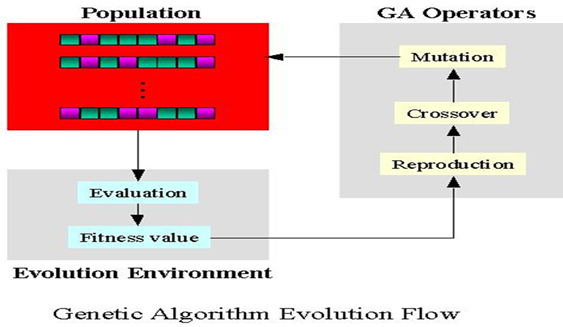

接下来，我们将详细地址剖析一算法算法的每一个细节。

编制袋鼠的染色体--基因的编码方式

受到人类染色体结构的启发，我们可以设想一下，假设目前只有”0，1“两种碱基，我们也用一条链条把他们有序的串连在一起，因为每一个单位都能表现出1bit的信息量，所以一条足够长的染色体就能为我们勾勒出一个个体的所有特征。这就是<font color='red'>二进制编码法</font>，染色体大致如下：

010010011011011110111110

上面的编码方式虽然简单直观，但明显地，当个体特征比较复杂的时候，需要大量的编码才能精确地描述，相应的解码过程（类似于生物学中的DNA翻译过程，就是把基因型映射到表现型的过程。）将过分繁杂，为改善遗传算法的计算复杂度、提高运算效率，提出了<font color='red'>浮点数编码</font>。染色体大致如下：

1.2–3.3–2.0–5.4–2.7–4.3

> 注：还有一种编码方式叫符号编码。

> 思考：这种数据编码方式，类似于onehot编码，woe编码...

那么我们如何利用这两种方式来为袋鼠的染色体编码呢？因为编码的目的是建立表现型到基因型的映射关系，而表现型一般就被理解为个体的特征。比如人的基因型是46条染色体所描述的却能解码成一个眼，耳，口，鼻等特征各不相同的活生生的人。所以我们要向为”袋鼠“的染色体编码，我们必须先来考虑”袋鼠“的”个体特征“是什么？也许有的人会说，袋鼠的特征很多，比如性别，身长，体重，也许它喜欢吃什么也能算作其中一个特征。但具体在解决这个问题的情况下，我们应该进一步思考：无论这只袋鼠是长短，肥瘦，黑白，只要它在低海拔就会被射杀，同时也没有规定身长的袋鼠能跳得远一些，身短的袋鼠跳得近一些。当然它爱吃什么就更不相关了。我们由始至终都只关心一件事：袋鼠在哪里。因为只要我们知道袋鼠在哪里，我们就能做两件必须去做的事情：

1. <font color='red'>通过查阅喜马拉雅山脉的地图来得知袋鼠所在的海拔高度（通过自变量求适应函数的值。）以判断我们有没有必要把它射杀。</font>
2. <font color='red'>知道袋鼠跳一跳（交叉和变异）后去到哪个新位置。</font>

> 思考：其实就是基因型通过适应函数进行映射得到表现型，也就是说通过其”个体特征“来得到其可能去去向的某个位置，再通过判断位置，看是否需要去掉...

如果我们一时无法准确的判断哪些”个体特征“是必要的，哪些是非必要的，我们常常可以用到这样一种思维方式：比如你认为袋鼠的爱吃什么东西非常必要，那么你就想一想，有两只袋鼠，它们的其它个体特征完全相同的情况下，一只长得黑，另一只长得不是那么黑。你会马上发现，这不会对它的命运有丝毫的影响，它们有同等的概率被射杀！只因它们所处同一个地方。（值得一提的是，如果你的基因编码涉及中包含了袋鼠黑不黑的信息，这其实不会影响到袋鼠的进化的过程，而那只攀到珠穆拉玛峰的大叔黑与白什么的也完全是随机的，但是它所在的位置确实非常确定的。）

以上是对遗传算法编码过程中经常经历的思维过程，必须把具体问题抽象成数学模型，如初主要矛盾，舍弃次要矛盾。只有这样才能简洁而有效地解决问题。

既然确定了袋鼠的位置作为个体特征，具体来说位置就是横坐标。那么接下来，我们就要建立表现型到基因型的映射关系。就是说如何用编码来表现出袋鼠所在的横坐标。由于横坐标是一个实数，所以说透了我们就要对这个实数编码。回顾上面所介绍的两种编码方式，最先想到的应该就是二进制编码，该编码会比较复杂，而对于浮点数编码来说，则会比较简洁。正如你所想到的，用浮点数编码，仅仅需要一个点而已。而下面则介绍如何建立二进制编码到一个实数编码的映射。

> 思考：将实数（表现型）映射（编码）成基因型...

明显地，一定长度的二进制编码序列，只能表示一定精度的浮点数。譬如我们要求解精确到六位小数，由于区间长度为2-(-1)=3，为了保证精度要求，至少把区间[-1, 2]分为3 x $10^6$等份。又因为

$$2097152 = 2^{21} < 3 * 10^6 < 2^{22} = 4194304$$

> 思考：一个二进制编码十进制表示...

所以编码的二进制串至少需要22位。

把一个二进制串（$b_0,b_1, \cdots, b_n$）转换为区间里面对应的实数值通过两个步骤：

1. 将一个二进制串代表的二进制数转换为10进制数：

$$(b_0 \cdots b_{20}b_{21}) = \bigr(\sum_{i=0}^{21}b_i \cdot 2^i\bigr)_{10} = x^t$$

2. 对应区间内的实数：

$$x = -1 + x^t\frac{2-(-1)}{2^{22}-1}$$

例如一个二进制串<1000101110110101000111>表示实数值0.637197

$$x^t = (1000101110110101000111)_2 = 2288967$$
$x = -1 + 2288967 \cdot \frac{3}{2^{22} -1} = 0.637197$

二进制<0000000000000000000000>和<1111111111111111111111>则分别表示区间的两个端点值-1和2。

> 这里的区间范围为[-1, 2]。实现了用一个浮点数来表示基因值，而使用二进制法显然长度会很长... 而且数据存在稀疏性，函数收敛不稳定...

In [2]:
np.linspace(-1, 2, 3 * 10 ** 6)

array([-1.      , -0.999999, -0.999998, ...,  1.999998,  1.999999,
        2.      ])

### 补充知识

遗传算法中对于编码的选择对结果会有很大的影响，编码方法影响到交叉算子、变异算子等遗传算子的运算方法，大很大程度上决定了遗传进化的效率。对于二进制编码很容易只能获得局部最优解，而想要获得全局最优解，只能加大变异率（也就是步法跳大些）。

一般我们说的编码可分为三大类：二进制编码法、浮点编码法、符号编码法。

**1. 二进制编码方法：**

它由二进制符号0和1所组成的二值符号集。有以下一些优点：

1. 编码、解码操作简单易用；
2. 交叉、变异等遗传操作操作便于实现；
3. 符号最小字符集编码原理；
4. 利用模式定理对算法进行理论分析。

二进制编码的缺点：

对于一些连续函数的优化问题，由于其随机性使得其局部搜索能力较差，如归于一些高精度的问题（如上题），当解逼近于最优解后，由于其变异后表现型变化很大（从二进制表格就可以看出，十进制发生变化后，表现为二进制多位发生变化，不容易得到最优解），不连续，所以会远离最优解，达不到稳定。而格雷码能有效地防止这类现象。

**2. 格雷码方法：**

格雷码方法是这样一种编码方法，其连续两个整数所对应的编码值之间仅仅只有一个码位是不同的。如下表：

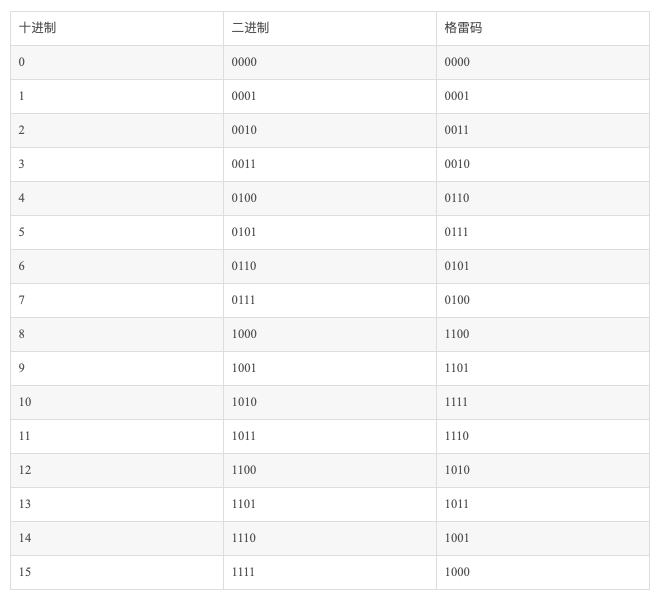

> 注意：看二进制与格雷码的不同之处...

假设有一个二进制编码$B=b_mb_{m-1} \cdots b_2b_1$，其对应的格雷码为$G=g_mg_{m-1} \cdots g_2g_1$

由二进制编码转格雷码的转换公式为：

$$gm = bm$$
$$g_i = b_i \oplus b_i, \hspace{0.2cm} i=m-1, m-2, \cdots, 2, 1$$

由格雷码转二进制的转换公式为：

$$bm = gm$$
$$b_i = b_{i+1} \oplus g_i, \hspace{0.2cm} i=m-1, m-2, \cdots, 2, 1$$

从以上表格可以看出，当一个染色体编译后，它原来的表现型和现在的表现型是连续的。

格雷码编码的主要优点是：

1. 便于提高遗传算法的局部搜索能力；
2. 交叉、变异等遗传操作便于实现；
3. 符合最小字符集编码原则；
4. 便于利用模式定理对算法进行理论分析。

**3. 浮点编码法**

对于一些多位、高精度要求的连续函数优化问题，使用二进制编码来表示个体时将会有一些不利之处。

二进制编码存在着连续函数离散化时的映射误差。个体长度较长时，可能达不到精度要求，而个体编码长度较长时，虽然能提高精度，但却使遗传算法的搜索空间急剧扩大。

所谓浮点法，是指个体的每个基因值用某一范围内的一个浮点数来表示。在浮点数编码方法中，必须保证基因值在给定的区间限制范围内，遗传算法中所使用的交叉、变异等遗传算法也必须保证其运算结果所产生的新个体的基因值也在这个区间限制范围内。

浮点数编码方法有下面几个优点：

1. 适用于在遗传算法中表示范围较大的数；
2. 适用于精度要求较高的遗传算法；
3. 便于较大空间的遗传搜索；
4. 改善了遗传算法的计算复杂性，提高了运算效率；
5. 便于遗传算法与经典优化方法的混合使用；
6. 便于设计有针对性问题的知识遗传算子；
7. 便于处理复杂的决策变量的约束条件。

**4. 符号编码法**

符号编码法是指个体染色体编码串中的基因值取自一个无数值含义、而只有代码含义的符号集如{A,B,C,...}。

符号编码的主要优点是：

1. 符合有意义积木块编码原则；
2. 便于在遗传算法中利用所求解问题的专门知识；
3. 便于遗传算法与相关近似算法之间的混合使用。

但对于使用符号编码方法的遗传算法，一般需要认真设计交叉、变异等遗传运算的操作方法，以满足问题的各种约束条件，这样才能提高算法的搜索性能！

**物竞天择--适应性评分以及选择函数**

**1. 物竞--适应性函数**

自然界生物竞争过程往往包含两个方面：生物相互间的搏斗以及客观环境的搏斗过程。但在这个实例中，你可以想象到，袋鼠相互之间是非常友好的，它们并不需要互相搏斗以争取生存的权利。它们的生死存亡更多是取决于你的判断。因为你要衡量哪只袋鼠该杀，哪只不该杀，所以你必须制定一个衡量的标准。而对于这个问题，衡量的标准比较容易制定：袋鼠所在的海拔高度。（因为你单纯地希望袋鼠爬得越高越好。）所以我们直接用袋鼠的海拔高度作为它们的适应性评分，即使用函数直接返回函数值即可。

**2. 天择--选择函数**

自然界中，越适应的个体就越有可能繁殖后代。但是也不能说适应度越高的就肯定后代越多，只能说从概率上来说更多。（毕竟有些所处海拔高度较低的袋鼠很幸运，逃过了你的眼睛。）那么我们怎么来简历这种概率关系呢？下面我们介绍一种常用的选择方法--轮盘赌选择法（让我想到了《海贼王》里的大妈使用的方法-轮盘赌）

比如我们有5条染色体，它们所对应的适应度评分分别为：5，7，10，13，15。

所以累计总适应度为：

$$F = \sum_{i=1}^nf_i = 5 + 7 + 10 + 13 + 15 = 50$$

所以各个个体被选中的概率分别为：

$$P_1 = \frac{f_1}{F} \times 100\% = \frac{5}{50} \times 100\% = 10\%$$
$$P_2 = \frac{f_2}{F} \times 100\% = \frac{7}{50} \times 100\% = 14\%$$
$$P_3 = \frac{f_3}{F} \times 100\% = \frac{10}{50} \times 100\% = 20\%$$
$$P_4 = \frac{f_4}{F} \times 100\% = \frac{13}{50} \times 100\% = 26\%$$
$$P_5 = \frac{f_5}{F} \times 100\% = \frac{15}{50} \times 100\% = 30\%$$

你可以想象一下，我们转动轮盘，轮盘停下来的时候，指针会随机地指向某个个体所代表的区域，那么这个个体就非常幸运地被选中（很明显，适应度评分越高的个亿被选中的概率越大。）

> 注：还有精英选择机制..

**遗传变异--基因重组（交叉）与基因突变**

应该说这两个步骤就是使得子代不同于父代的根本原因（注意：没有说子代优于父代，只是经过自然的选择后，才会出现子代优于父代的倾向。）对于这两种遗传操作，二进制编码和浮点编码在处理上有很大的差异，其中二进制编码的遗传操作过程，比较类似于自然界里的过程，下面将分开讲。

**1. 基因重组/交叉**

1. 二进制编码

二进制编码的基因交换过程非常类似高中生物中所讲的同源染色体的连接过程--随机把其中几个位于同一位置的编码进行交换，产生新的个体。

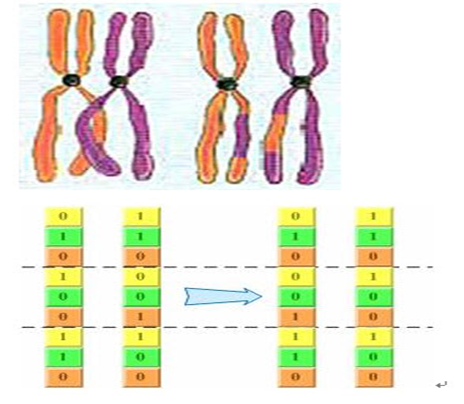

**2. 浮点数编码**

如果一条基因中含有多个浮点编码，那么也可以用上面类似的方法进行基因交叉，不同的是进行交叉的基本单位不是二进制码，而是浮点数。而如果对于单个浮点数的基因交叉，就有其它不同的重组方式了，比如中间重组：随机产生就能得到介于父代基因编码值和母代基因编码值之间的值作为子代基因编码的值。比如5.5和6交叉，产生5.7，5.6。

考虑到”袋鼠跳“问题的具体情况--袋鼠的个体特征仅仅表现为它所处的位置。可以想象，同一个位置的袋鼠的基因是完全相同的，而两条相同的基因进行交叉后，相当于什么都没有做，所以我们不打算在这个例子里使用交叉这一遗传操作步骤。（当然硬要使用这个操作步骤也不是不行，你可以把两只异地的袋鼠捉到一起，让它们交配，然后产生子代，再把它们送到它们应该到的地方。）（交叉率）

**2. 基因突变**

1. 二进制编码

基因突变过程：金银突变是染色体的某个位点上基因的改变。基因突变使一个基因变成它的等位基因，并且通常会引起一定的表现变化。正如上面所说，二进制编码的遗传操作过程和生物学中的过程非常相似，基因串上的”0“或”1“有一定几率变成鱼之相反的"1"或"0"。例如下面这串二进制编码：

101101001011001

经过基因突变后，可能变成以下这串新的编码：

001101011011001

2. 浮点型编码

浮点型编码的基因突变过程一般是对原来的浮点数增加或者减少一个小随机数。比如原来的浮点数串如下：

1.2,3.4,5.1, 6.0, 4.5

变异后，可能得到如下的浮点数串：

1.3,3.1,4.9, 6.3, 4.4

当然，这个小随机数也有大小之分，我们一般管它叫”步长“（变异率）。（想想”袋鼠跳“问题，袋鼠跳的长短就是这个步长。）一般来说步长越大，开始时进化的速度就会比较快，但是后来比较难收敛到精确的点上。而小步长却能较精确的收敛到一个点上。所以很多时候为了加速遗传算法的进化速度，而又能保证后期能够比较精确地收敛到最优解上面，会采取动态改变步长的方法。其实这个过程与前面介绍的模拟退火过程比较类似。

到此为止，基因编码，基因适应度评估（适应频度），基因选择（轮盘赌），基因变异都一一实现了，剩下来就是把这些零件一一组装起来...

**总结：**

**编码原则**

完备性：问题空间的所有解都能表示为所设计的基因型；
健全性：任何一个基因型都对应于一个可行解；
非冗余性：问题空间和表达空间一一对应。

**适应度函数的重要性**

适应度函数的选取直接影响遗传算法的收敛速度以及能否找到最优解。一般而言，适应度函数是由目标函数变换而成的。

适应度函数设计不当有可能出现欺骗问题：

1. 进化初期，个别超常个体控制选择过程；
2. 进化末期，个体差异太小导致陷入局部极值。

欺骗问题举例：

还是袋鼠问题，如果低海拔的地方出现毒雾，会杀死袋鼠，只有爬上珠穆拉玛峰顶端的袋鼠才能生存下来。

因为喜马拉雅山脉有很多山峰，我们以高度作为适应度，case 1: 如果不在珠峰的猴子若比在珠峰半山腰的猴子要高，因为种群太小不变，在珠峰的猴子可能就会被淘汰；case 2: 100只猴子都不在珠峰；

1. 选择的作用：优胜劣汰，适者生存；
2. 交叉的作用：保证种群的稳定性，朝着最优解的方向进化；
3. 变异的作用：保证种群的多样性，避免交叉可能产生的局部收敛。

In [3]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:  33%|███▎      | 40/120 [03:24<06:15,  4.69s/pipeline]

Generation 1 - Current best internal CV score: 0.9688048718834719


Optimization Progress:  50%|█████     | 60/120 [07:47<12:19, 12.32s/pipeline]

Generation 2 - Current best internal CV score: 0.9688048718834719


Optimization Progress:  67%|██████▋   | 80/120 [11:40<08:12, 12.31s/pipeline]

Generation 3 - Current best internal CV score: 0.9688048718834719


Optimization Progress:  83%|████████▎ | 100/120 [16:45<05:04, 15.22s/pipeline]

Generation 4 - Current best internal CV score: 0.9717544149272068


Generation 5 - Current best internal CV score: 0.9746869980387816

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=16, n_estimators=100, subsample=0.45)
0.9755555555555555
